# Logistic Regression

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from evaluation import *
from feature_scaler import *

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Data Pre-processing

In [39]:
df = pd.read_csv('./data/breast-cancer.csv')

encoder = LabelEncoder()
df['diagnosis'] = encoder.fit_transform(df['diagnosis'])
df = df.drop(columns=["id"], axis=1)

In [40]:
# Data split and scaling
X = df.drop(columns=["diagnosis"])
y = df['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_ss, X_test_ss = standard_scaler(X_train, X_test) # Standard Scaler
X_train_mms, X_test_mms = min_max_scaler(X_train, X_test) # Min-Max Scaler

### Removing features when the correlation between them exceeds a certain threshold

In [41]:
X_corr = X.corr(numeric_only=True).round(3)
correlation_threshold = 0.9
upper_matrix = X_corr.where(np.triu(np.ones(X_corr.shape), k=1).astype(bool))
features_to_drop = [x for x in upper_matrix.columns if any(upper_matrix[x] > correlation_threshold)]
X_corr = X.drop(X[features_to_drop], axis=1)

X_corr_train, X_corr_test = train_test_split(X_corr, test_size=0.2, random_state=42)
X_corr_train_ss, X_corr_test_ss = standard_scaler(X_corr_train, X_corr_test) # Standard Scaler
X_corr_train_mms, X_corr_test_mms = min_max_scaler(X_corr_train, X_corr_test) # Min-Max Scaler

## Implementation from Scratch

In [42]:
class LinearRegressionClassifier:
    def __init__(self, learning_rate=0.01, num_iterations=1000, threshold=0.5):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.threshold = threshold
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        num_samples, num_features = X.shape

        self.weights = np.zeros(num_features)
        self.bias = 0

        for _ in range(self.num_iterations):
            predictions = self.predict(X)

            dw = (1/num_samples) * np.dot(X.T, (predictions - y))
            db = (1/num_samples) * np.sum(predictions - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        return expit(np.dot(X, self.weights) + self.bias)

    def classify(self, predictions):
        return (predictions >= self.threshold).astype(int)

    def accuracy(self, y_true, y_pred):
        return np.mean(y_true == y_pred)

In [43]:
model = LinearRegressionClassifier(learning_rate=0.01, num_iterations=1000, threshold=0.5)
model.fit(X_train, y_train)

predictions = model.predict(X_test)
classified_predictions = model.classify(predictions)

accurracy = model.accuracy(y_test, classified_predictions)
print("Accuracy:", accurracy * 100, "%")

NameError: name 'expit' is not defined

## Built-In

### Min-Max Scaling

In [56]:
score = [] 
model = LogisticRegression()
model.fit(X_train_mms, y_train)
y_pred = model.predict(X_test_mms)
score.append(np.array(evaluate(y_test, y_pred, False)))

model = LogisticRegression()
model.fit(X_corr_train_mms, y_train)
y_pred = model.predict(X_corr_test_mms)
score.append(np.array(evaluate(y_test, y_pred, False)))

### Standard Scaling

In [57]:
model = LogisticRegression()
model.fit(X_train_ss, y_train)
y_pred = model.predict(X_test_ss)
score.append(np.array(evaluate(y_test, y_pred, False)))

model = LogisticRegression()
model.fit(X_corr_train_ss, y_train)
y_pred = model.predict(X_corr_test_ss)
score.append(np.array(evaluate(y_test, y_pred, False)))

### PCA

In [58]:
tmp_pca = [0,0,0,0,0,0]
tmp_pca2 = [0,0,0,0,0,0]

import warnings
for n in range(2, 20):
    pca = PCA(n_components=n)
    pca.fit(X_train)

    warnings.filterwarnings("ignore")
    X_train_pca = pca.transform(X_train_mms)
    X_test_pca = pca.transform(X_test_mms)

    model = LogisticRegression()
    model.fit(X_train_pca, y_train)
    y_pred = model.predict(X_test_pca)
    tmp = evaluate(y_test, y_pred, False)
    if tmp_pca[0] < tmp[0]:
        tmp_pca = tmp

    pca = PCA(n_components=n)
    pca.fit(X_corr_train_ss)

    warnings.filterwarnings("ignore")
    X_train_pca = pca.transform(X_corr_train_mms)
    X_test_pca = pca.transform(X_corr_test_mms)

    model = LogisticRegression()
    model.fit(X_train_pca, y_train)
    y_pred = model.predict(X_test_pca)
    tmp = evaluate(y_test, y_pred, False)
    if tmp_pca2[0] < tmp[0]:
        tmp_pca2 = tmp

score.append(tmp_pca)
score.append(tmp_pca2)


In [59]:
tmp_pca = [0,0,0,0,0,0]
tmp_pca2 = [0,0,0,0,0,0]

import warnings
for n in range(2, 20):
    pca = PCA(n_components=n)
    pca.fit(X_train)

    warnings.filterwarnings("ignore")
    X_train_pca = pca.transform(X_train_ss)
    X_test_pca = pca.transform(X_test_ss)

    model = LogisticRegression()
    model.fit(X_train_pca, y_train)
    y_pred = model.predict(X_test_pca)
    tmp = evaluate(y_test, y_pred, False)
    if tmp_pca[0] < tmp[0]:
        tmp_pca = tmp

    pca = PCA(n_components=n)
    pca.fit(X_corr_train_ss)

    warnings.filterwarnings("ignore")
    X_train_pca = pca.transform(X_corr_train_ss)
    X_test_pca = pca.transform(X_corr_test_ss)

    model = LogisticRegression()
    model.fit(X_train_pca, y_train)
    y_pred = model.predict(X_test_pca)
    tmp = evaluate(y_test, y_pred, False)
    if tmp_pca2[0] < tmp[0]:
        tmp_pca2 = tmp

score.append(tmp_pca)
score.append(tmp_pca2)

In [60]:
pd.DataFrame(score,
    index=['Min-Max Scaler', 'Min-Max Scaler Corr', 'Standard Scaler', 'Standard Scaler Corr', 'PCA Min-Max Scaler', 'PCA Min-MAx Scaler Corr', 'PCA Standard Scaler', 'PCA Standard Scaler Corr'], 
    columns=['Accuracy', 'F1', 'Recall', 'Precision', 'AUC', 'Confusion Matrix'])

,Accuracy,F1,Recall,Precision,AUC,Confusion Matrix
Min-Max Scaler,0.982456,0.982369,0.982456,0.982937,0.976744,"[[71, 0], [2, 41]]"
Min-Max Scaler Corr,0.956140,0.955801,0.956140,0.956905,0.946446,"[[70, 1], [4, 39]]"
Standard Scaler,0.973684,0.973621,0.973684,0.973719,0.969702,"[[70, 1], [2, 41]]"
Standard Scaler Corr,0.982456,0.982456,0.982456,0.982456,0.981330,"[[70, 1], [1, 42]]"
PCA Min-Max Scaler,0.964912,0.964738,0.964912,0.965205,0.958074,"[[70, 1], [3, 40]]"
PCA Min-MAx Scaler Corr,0.964912,0.964738,0.964912,0.965205,0.958074,"[[70, 1], [3, 40]]"
PCA Standard Scaler,0.991228,0.991207,0.991228,0.991350,0.988372,"[[71, 0], [1, 42]]"
PCA Standard Scaler Corr,0.982456,0.982456,0.982456,0.982456,0.981330,"[[70, 1], [1, 42]]"


Accuracy: 0.991228
F1 Score: 0.991207
Recall: 0.991228
Precision: 0.99135
AUC: 0.988372
Confusion Matrix: 
[[71, 0], [1, 42]]


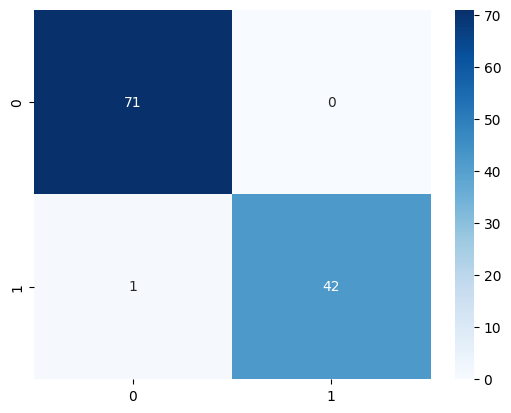

In [61]:
print(f'Accuracy: {0.991228}')
print(f'F1 Score: {0.991207}')
print(f'Recall: {0.991228}')
print(f'Precision: {0.991350}')
print(f'AUC: {0.988372}')
print(f'Confusion Matrix: \n{[[71, 0], [1, 42]]}')


sns.heatmap([[71, 0], [1, 42]], annot=True, cmap='Blues')
plt.show()